#### 샘플 예제 : 붓꽃 (petal : 꽃받침 / Sepal : 꽃잎)

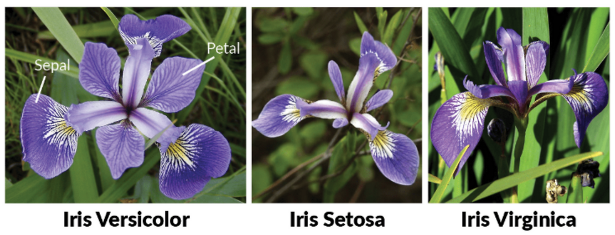

In [ ]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix 
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
df = pd.read_csv('./data/iris.csv')
df

In [ ]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [ ]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [ ]:
# SVM 모델 생성 (RBF 커널 사용, C=1.0, gamma='scale')
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)  # 모델 학습


In [ ]:
# 예측 및 평가
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM 정확도: {accuracy:.2f}")

### SVM 추가 예제 (kernel 설정에 따른 차이점)

In [ ]:
X = df[['SepalLengthCm','SepalWidthCm']]
y = df['Species']

In [ ]:
# OrdinalEncoder (y 변환)
import category_encoders as ce

encoder = ce.OrdinalEncoder()
y = encoder.fit_transform(y)

In [ ]:
y.head()

#### Linear SVC

In [ ]:
# SVM의 regularization parameter
clf_l = SVC(kernel = "linear", C=1)
clf_l.fit(X,y)

y_pred = clf_l.predict(X)     
print(accuracy_score(y, y_pred))                    # 학습데이터 분류예측
confusion_matrix(y, y_pred)  

#### rbf SVC

In [ ]:
# rbf 활용 (kernel='rbf', gamma=0.7, C=1, max_iter=10000)

 
#gamma는 sigma^2에 해당하는 scale parameter
#학습 반복횟수 10000

clf_r.fit(X,y)
y_pred = clf_r.predict(X)
print(accuracy_score(y, y_pred))   
confusion_matrix(y, y_pred)

#### polynomial SVC

In [ ]:
# polynomial 활용 (kernel='poly', degree=3, gamma='auto', C=1, max_iter=10000)


#3차항으로 설정, degree = 3
#gamma는 sigma^2에 해당하는 scale parameter
#학습 반복횟수 10000

clf_p.fit(X,y)
y_pred = clf_p.predict(X)
print(accuracy_score(y, y_pred))   
confusion_matrix(y, y_pred)

### Visualization SVM

In [ ]:
x_min, x_max=X.iloc[:,0].min()-1, X.iloc[:,0].max()+1
y_min, y_max=X.iloc[:,1].min()-1,X.iloc[:,1].max()+1
plot_unit=0.025
xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))


- model control

In [ ]:
clf_l = SVC(kernel = "linear", C=1).fit(X,y)  # SVM 모델 생성 (선형 커널 사용)
clf_r = SVC(kernel = 'rbf', gamma = 0.5, C=1).fit(X,y.values.ravel())
clf_p = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=1).fit(X,y.values.ravel()) 

In [ ]:
z=clf_l.predict(np.c_[xx.ravel(), yy.ravel()]) 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.index, edgecolor='k', s=20)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine(linear kernel)')
plt.show()
print('정확도:',clf_l.score(X=X, y=y))

In [ ]:
z=clf_r.predict(np.c_[xx.ravel(), yy.ravel()]) 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.index, edgecolor='k', s=20)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',clf_r.score(X=X, y=y))

In [ ]:
z=clf_p.predict(np.c_[xx.ravel(), yy.ravel()]) 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X.index, edgecolor='k', s=20)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도:',clf_p.score(X=X, y=y))